#Importing the required libraries

In [ ]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt

#load dataset

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

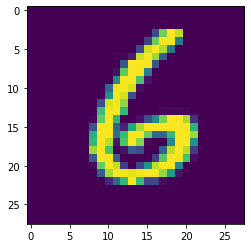

In [ ]:
plt.imshow(x_train[6000])

In [ ]:
np.argmax(y_train[6000])

0

#Reshaping Dataset

In [ ]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

#Applying One Hot Encoding

In [ ]:
number_of_classes = 10 

In [ ]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

#Add CNN Layers

In [ ]:
model=Sequential ()

In [ ]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(number_of_classes,activation = 'softmax'))

#Compiling the model

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#Train the model

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.2617 - accuracy: 0.9476 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0720 - accuracy: 0.9783 - val_loss: 0.0830 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0832 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 181s 97ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0857 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.1200 - val_accuracy: 0.9760


#Observing the metrics

In [ ]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1200210228562355, 0.9760000109672546]


In [ ]:
model.save('models/Digits.h5')

In [ ]:
#saving in tar
!tar -zcvf digit-recognition.tgz Digits.h5

Digits.h5


#IBM Deployment

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.0 MB/s 
     |████████████████████████████████| 132 kB 47.5 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 48.5 MB/s 
     |████████████████████████████████| 140 kB 51.6 MB/s 
     |████████████████████████████████| 956 kB 61.6 MB/s 
     |████████████████████████████████| 135 kB 46.5 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73930 sha256=b7c6151f7eafb8c612ffc04f5101c374fb4857b7544c708cba54c1bba02b3a00
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=b764c863a0f

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 51 kB 651 kB/s 
     |████████████████████████████████| 824 kB 44.0 MB/s 
     |████████████████████████████████| 133 kB 47.7 MB/s 
     |████████████████████████████████| 547 kB 34.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72564 sha256=6c6d52fe1f497d8a65e7046a57def7a3df67385a4ed9fe202adba64b6bbe18d9
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=d9d8a81373e25e4ed9e5fdac23348e23011fc0f18399068324389dce286a0097
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"pDXXVs3a3uhZDSOhBb2tCKqNg5xRKV_7OLIAjx4yPIIj"
}
client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/5d9dbcc374654734a984015765690e62:0437af44-3dda-4c01-9299-6a0ac59bcc58::',
      'guid': '0437af44-3dda-4c01-9299-6a0ac59bcc58',
      'name': 'Watson Machine Learning-bw',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'deploy',
    'scope': {'bss_account_id': '5d9dbcc374654734a984015765690e62'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '762e6f59-0e33-4805-925b-63eee6b14df7',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '5f6508224c384fc99f737d70c9a24feb',
        'api_key': 'zmBYAzIlt6JO_65Up56ieQbUlZiEFdyj6QJ9ULz82EC6',
        'secret_access_key': '2029c01a20eac07a72dd44504d9c449d46a2c7f71ed0f44e',
        'service_id': 'ServiceId-5711592d-a323-43b0-884f-b6b4fe584afc'},
       'editor': {'access_key_id': '9c5b271513dd4a3fae8b27d3f8e89412',
        'api_key': 

In [ ]:
def guid_space_name(client,deploy):
  space= client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_space_name(client,'deploy')
space_uid

'79caef59-a458-4201-add7-1763e1a6a341'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid 

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='digit-recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-08T17:19:08.038Z',
  'id': '75ea167c-2bed-49c5-8ff5-693fb1483a96',
  'modified_at': '2022-11-08T17:19:12.156Z',
  'name': 'CNN Model',
  'owner': 'IBMid-666002KI5I',
  'resource_key': '91f50a84-fc48-4b38-a60d-984918b5d80f',
  'space_id': '79caef59-a458-4201-add7-1763e1a6a341'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'75ea167c-2bed-49c5-8ff5-693fb1483a96'

In [ ]:
client.repository.download(model_id,'IBM_model.tar.gb')

Successfully saved model content to file: 'IBM_model.tar.gb'


'/content/IBM_model.tar.gb'